### Exercise from the book

### Question:
Train and fine-tune a decision tree for the moons dataset by following these steps:

a. Use make_moons(n_samples=10000, noise=0.4) to generate a moons dataset.

b. Use train_test_split() to split the dataset into a training set and a test set.

c. Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a DecisionTreeClassifier. Hint: try various values for max_leaf_nodes.

d. Train it on the full training set using these hyperparameters, and measure your model’s performance on the test set. You should get roughly 85% to 87% accuracy.

In [3]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples = 10000, noise = 0.4)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

dt = DecisionTreeClassifier(random_state = 42)
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [19]:
params_dt = {
    'max_depth' : [3, 5, 7, 9],
    'max_leaf_nodes' : [8, 10, 12],
}

grid_dt = GridSearchCV( estimator = dt, param_grid = params_dt, scoring = 'accuracy', cv = 10)
grid_dt.fit(X_train, y_train)

best_hyperparams = grid_dt.best_params_
best_model = grid_dt.best_estimator_
best_model.score(X_test, y_test)

0.8612

In [21]:
from sklearn.tree import export_graphviz

export_graphviz(
    best_model, 
    out_file = "tree.dot",
    rounded = True,
    filled = True
)


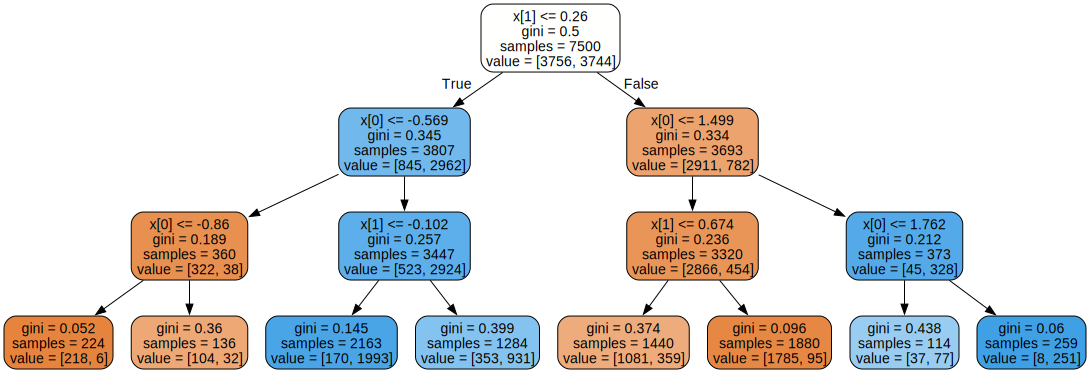

In [23]:
from graphviz import Source

src = Source.from_file("tree.dot")
src